In [12]:
import numpy as np
import pandas as pd
import chardet
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


In [13]:
# Detect the encoding of the CSV file
with open('SQLIV3_cleaned2.csv', 'rb') as f:

    result = chardet.detect(f.read())
# Read the CSV file into a pandas dataframe, using the detected encoding
df = pd.read_csv('SQLIV3_cleaned2.csv', sep=',', encoding=result['encoding'])

df

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30609,DELETE FROM door WHERE grow = 'small',0
30610,DELETE FROM tomorrow,0
30611,SELECT wide ( s ) FROM west,0
30612,SELECT * FROM ( SELECT slide FROM breath ),0


In [14]:

df.duplicated().sum()

np.int64(12)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:

df.duplicated().sum()

np.int64(0)

In [17]:
df['Label'].value_counts()

,count
Label,
0,19260
1,11342


<ipython-input-18-39b74c0c30a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)
<ipython-input-18-39b74c0c30a2>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)


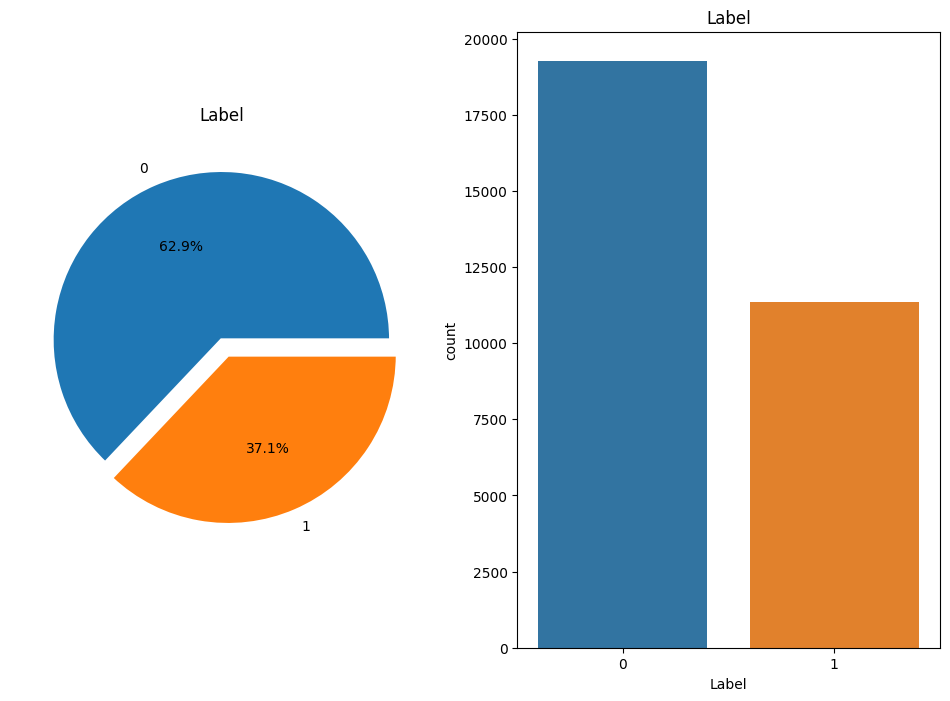

In [18]:
import matplotlib.colors as mcolors
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
df['Label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True}, colors=colors)

ax[0].set_title('Label')
ax[0].set_ylabel('')
sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Label')
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [20]:
X = tfidf.fit_transform(df['Sentence']).toarray()

In [21]:
X.shape


(30602, 3000)

In [22]:
y = df['Label'].values


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [26]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [27]:


# Prédictions
y_train_pred = lrc.predict(X_train)
y_test_pred = lrc.predict(X_test)

# Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

if train_accuracy - test_accuracy > 0.1:
    print("Attention : possible overfitting détecté")
else:
    print("Pas d'indication forte d'overfitting")


Train accuracy: 0.983
Test accuracy: 0.981
Pas d'indication forte d'overfitting


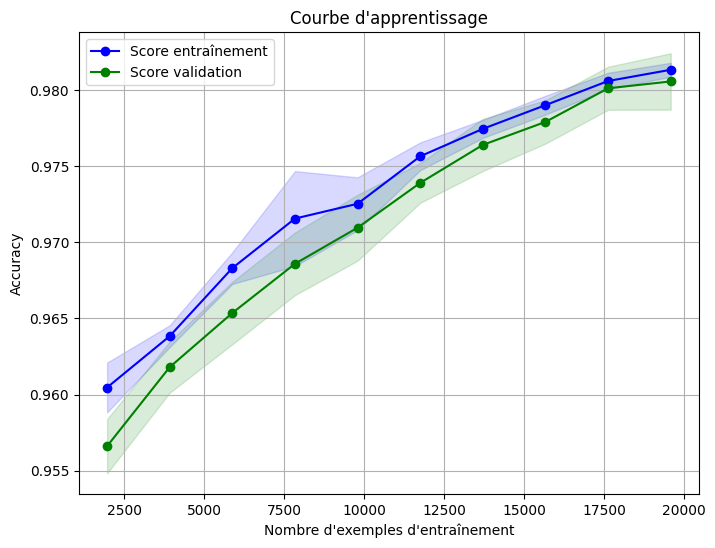

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Paramètres de ton modèle
lrc = LogisticRegression(solver='liblinear', penalty='l1')

# Calcul des learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lrc, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écart-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Courbe d\'apprentissage')
plt.xlabel('Nombre d\'exemples d\'entraînement')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [31]:


accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [32]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9812122202254534
Precision: 0.9972640218878249
Recall: 0.9525
F1 Score: 0.9744


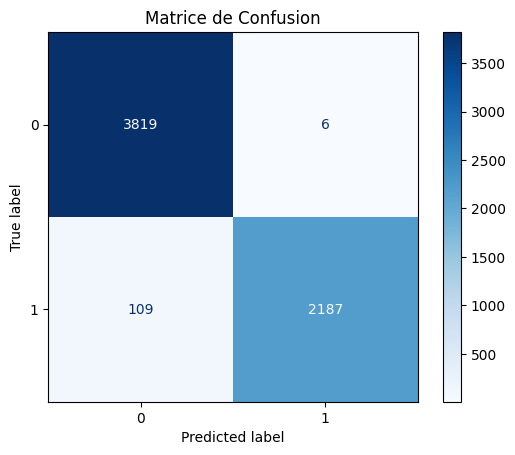

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

In [37]:
# Fonction pour prédire si un texte est sqli ou non
def predict_message(message):
       # Preprocess the message
      # Ensure you define this function for text preprocessing
    message_vectorized = tfidf.transform([message]) # Convert to dense array
    prediction = lrc.predict(message_vectorized)  # Make the prediction
    probas = lrc.predict_proba(message_vectorized)  # Get the probabilities
    label = "sql injection" if prediction[0] == 1 else "not sql injection"  # Assign label based on prediction
    return label, probas[0]



In [61]:

import os


# Définition du chemin relatif du fichier CSV
dataset_path = "/content/sqliv2_utf8.csv"

# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'], header=None, names=["payload", "label"], on_bad_lines='skip')

        # Vérification et conversion de la colonne label en numérique
        df_original['label'] = pd.to_numeric(df_original['label'], errors='coerce')

        # Suppression des lignes avec des valeurs NaN dans label
        df_original = df_original.dropna(subset=['label'])

        # Filtrer les lignes où label == 1
        df_filtered = df_original[df_original['label'] == 1]

        # Vérifier si df_filtered n'est pas vide avant l'échantillonnage
        if not df_filtered.empty:
            # Sélection aléatoire de 1000 lignes si possible
            df2 = df_filtered.sample(n=min(1000, len(df_filtered)), random_state=42)
            print(df2)
        else:
            print("Aucune donnée avec label = 1 trouvée dans le fichier.")
    except UnicodeDecodeError:
        print("Erreur d'encodage lors de la lecture du fichier. Essayez un autre encodage comme 'latin1' ou 'utf-16'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")

                                                 payload  label
7909                                 1 where 8889 = 8889    1.0
102                                          admin' or '    1.0
7608   1'  )  )   as cpwx where 5378 = 5378 rlike  ( ...    1.0
4256   1  )  )   procedure analyse ( extractvalue ( 9...    1.0
5475   1'+ ( select 'jtvq' where 8288 = 8288 and  ( s...    1.0
...                                                  ...    ...
6426      -5780 or make_set ( 3464 = 4518,4518 ) -- icit    1.0
4041   1%'  )  )   )  or exp ( ~ ( select * from  ( s...    1.0
9727   1'  )  )   )  and elt ( 2506 = 2383,2383 )  an...    1.0
11375  1"  )  )   )  or char ( 119 ) ||char ( 100 ) |...    1.0
6543   select case when 7649 = 9297 then 1 else null ...    1.0

[1000 rows x 2 columns]


In [54]:


# Supprimer les lignes contenant des valeurs NaN dans la colonne 'payload'
df2 = df2.dropna(subset=['payload'])

# Application de la fonction de prédiction sur df2
df2[['prediction', 'probability']] = df2['payload'].apply(lambda x: pd.Series(predict_message(x)))

# Compter les SQL injections détectées
sql_injection_count = (df2['prediction'] == "sql injection").sum()
print(f"number of SQL Injections detected : {sql_injection_count}")

number of SQL Injections detected : 931


In [53]:

import os


# Définition du chemin relatif du fichier CSV


# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV avec l'encodage détecté
        df_original1 = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'], header=None, names=["payload", "label"], on_bad_lines='skip')

        # Vérification et conversion de la colonne label en numérique
        df_original1['label'] = pd.to_numeric(df_original['label'], errors='coerce')

        # Suppression des lignes avec des valeurs NaN dans label
        df_original1 = df_original1.dropna(subset=['label'])

        # Filtrer les lignes où label == 1
        df_filtered1 = df_original1[df_original1['label'] == 0]

        # Vérifier si df_filtered n'est pas vide avant l'échantillonnage
        if not df_filtered1.empty:
            # Sélection aléatoire de 1000 lignes si possible
            df3 = df_filtered1.sample(n=min(1000, len(df_filtered1)), random_state=42)
            print(df3)
        else:
            print("Aucune donnée avec label = 1 trouvée dans le fichier.")
    except UnicodeDecodeError:
        print("Erreur d'encodage lors de la lecture du fichier. Essayez un autre encodage comme 'latin1' ou 'utf-16'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")

                                                 payload  label
21297                                           marbella    0.0
30871                                              03520    0.0
17788                                               4364    0.0
21021                                       enjabonadura    0.0
26714                                            pt*rido    0.0
...                                                  ...    ...
23306                                        ab6ga*d45co    0.0
25771                                          l680jis45    0.0
24610                                         eliana, l'    0.0
19112                          wickens@cpanelhost.com.ht    0.0
3793    The meeting point one half hour tour Nuclear ...    0.0

[1000 rows x 2 columns]


In [55]:


# Supprimer les lignes contenant des valeurs NaN dans la colonne 'payload'
df3 = df3.dropna(subset=['payload'])

# Application de la fonction de prédiction sur df2
df3[['prediction', 'probability']] = df3['payload'].apply(lambda x: pd.Series(predict_message(x)))

# Compter les SQL injections détectées
non_sql_injection_count = (df3['prediction'] == "not sql injection").sum()
print(f"number of normal queries : {non_sql_injection_count}")

number of normal queries : 995


In [62]:
import os
import pandas as pd
import chardet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définition du chemin du fichier CSV


# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV
        df = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'],
                         header=None, names=["payload", "label"], on_bad_lines='skip')

        # Nettoyage des données
        df['label'] = pd.to_numeric(df['label'], errors='coerce')
        df = df.dropna(subset=['label', 'payload'])

        # Filtrer uniquement les lignes avec label == 1
        df_label1 = df[df['label'] == 1]

        # Supprimer les doublons (garder le premier)
        df_label1 = df_label1.drop_duplicates(subset='payload', keep='first')


        # Appliquer la prédiction
        df_label1[['prediction', 'probability']] = df_label1['payload'].apply(lambda x: pd.Series(predict_message(x)))

        # Convertir la prédiction en labels binaires pour métriques
        # 1 si prédiction est 'sql injection', sinon 0
        y_true = [1] * len(df_label1)  # Car tous sont label=1
        y_pred = [1 if pred == "sql injection" else 0 for pred in df_label1['prediction']]

        # Calcul des métriques
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # Affichage des résultats
        print(f"number of sql injection detected : {(df_label1['prediction'] == 'sql injection').sum()} / {len(df_label1)}")
        print(f"Accuracy : {accuracy*100:.2f}%")
        print(f"Precision : {precision*100:.2f}%")
        print(f"Recall : {recall*100:.2f}%")
        print(f"F1 Score : {f1*100:.2f}%")

    except UnicodeDecodeError:
        print("Erreur d'encodage. Essayez 'latin1' ou 'utf-8-sig'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")


number of sql injection detected : 10600 / 11424
Accuracy : 92.79%
Precision : 100.00%
Recall : 92.79%
F1 Score : 96.26%


In [64]:
import os
import pandas as pd
import chardet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définition du chemin du fichier CSV
dataset_path = "/content/sqliv2_utf8.csv"

# Vérification de l'existence du fichier
if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage du fichier
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier CSV
        df = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'],
                         header=None, names=["payload", "label"], on_bad_lines='skip')

        # Nettoyage des données
        df['label'] = pd.to_numeric(df['label'], errors='coerce')
        df = df.dropna(subset=['label', 'payload'])

        # Filtrer uniquement les lignes avec label == 0
        df_label0 = df[df['label'] == 0]

        # Supprimer les doublons (garder le premier)
        df_label0 = df_label0.drop_duplicates(subset='payload', keep='first')


        # Appliquer la prédiction
        df_label0[['prediction', 'probability']] = df_label0['payload'].apply(lambda x: pd.Series(predict_message(x)))

        # Convertir la prédiction en labels binaires pour métriques
        # 0 si 'not sql injection', 1 si 'sql injection'
        y_true = [0] * len(df_label0)  # Car tous sont label=0 (payloads normaux)
        y_pred = [1 if pred == "sql injection" else 0 for pred in df_label0['prediction']]

        # Calcul des métriques
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0, pos_label=0)
        recall = recall_score(y_true, y_pred, zero_division=0, pos_label=0)
        f1 = f1_score(y_true, y_pred, zero_division=0, pos_label=0)

        # Affichage des résultats
        print(f"Nombre of normal queries detected : {(df_label0['prediction'] == 'not sql injection').sum()} / {len(df_label0)}")
        print(f"Accuracy : {accuracy*100:.2f}%")
        print(f"Precision (for label=0 comme ) : {precision*100:.2f}%")
        print(f"Recall (for label=0 comme ) : {recall*100:.2f}%")
        print(f"F1_Score (for label=0 comme ) : {f1*100:.2f}%")

    except UnicodeDecodeError:
        print("Erreur d'encodage. Essayez 'latin1' ou 'utf-8-sig'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")


Nombre of normal queries detected : 22132 / 22303
Accuracy : 99.23%
Precision (for label=0 comme ) : 100.00%
Recall (for label=0 comme ) : 99.23%
F1_Score (for label=0 comme ) : 99.62%


In [65]:
import os
import pandas as pd
import chardet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définition du chemin du fichier CSV
dataset_path = "/content/sqliv2_utf8.csv"

if os.path.exists(dataset_path):
    try:
        # Détection de l'encodage
        with open(dataset_path, 'rb') as f:
            result = chardet.detect(f.read())

        # Lecture du fichier
        df = pd.read_csv(dataset_path, sep=',', encoding=result['encoding'],
                         header=None, names=["payload", "label"], on_bad_lines='skip')

        # Nettoyage
        df['label'] = pd.to_numeric(df['label'], errors='coerce')
        df = df.dropna(subset=['label', 'payload'])

        # Supprimer les doublons
        df = df.drop_duplicates(subset='payload', keep='first')

        print(f"Nombre total de lignes après nettoyage : {len(df)}")

        # Appliquer la prédiction sur TOUT
        df[['prediction', 'probability']] = df['payload'].apply(lambda x: pd.Series(predict_message(x)))

        # Créer y_true et y_pred
        y_true = df['label'].astype(int).tolist()
        y_pred = [1 if pred == "sql injection" else 0 for pred in df['prediction']]

        # Calcul des métriques
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # Affichage
        print(f"Accuracy : {accuracy*100:.2f}%")
        print(f"Precision : {precision*100:.2f}%")
        print(f"Recall : {recall*100:.2f}%")
        print(f"F1 Score : {f1*100:.2f}%")

    except UnicodeDecodeError:
        print("Erreur d'encodage. Essayez 'latin1' ou 'utf-8-sig'.")
else:
    print(f"Le fichier {dataset_path} n'existe pas.")


Nombre total de lignes après nettoyage : 33725
Accuracy : 97.05%
Precision : 98.41%
Recall : 92.79%
F1 Score : 95.52%
